# Classification Metrics
> **Accuracy**, **Precision**, and **Recall** (plus their secret child: **F1-Score**)

---

# 1️⃣ The Core Idea

When your model predicts something (like spam / not spam),
it doesn’t just make *right or wrong* guesses.
It makes **four types of predictions** 👇

| Actual ↓ / Predicted → | **Positive (1)**      | **Negative (0)**      |
| ---------------------- | --------------------- | --------------------- |
| **Positive (1)**       | ✅ True Positive (TP)  | ❌ False Negative (FN) |
| **Negative (0)**       | ❌ False Positive (FP) | ✅ True Negative (TN)  |

So we have:

* **TP** → model correctly predicts a “Yes” (real positive)
* **TN** → model correctly predicts a “No” (real negative)
* **FP** → model says “Yes” but it’s actually “No” (false alarm)
* **FN** → model says “No” but it’s actually “Yes” (missed it)

---

# 2️⃣ Accuracy — “How often is my model right?”

```python
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```

### ✅ Good for:

When your dataset is **balanced** (equal 0s and 1s).
E.g., predicting cats vs dogs 🐱🐶.

### ⚠️ Bad for:

When one class dominates (like 95% “no fraud” data).
Because even a dumb model saying “no fraud” every time would get 95% accuracy — useless.

---

# 3️⃣ Precision — “When my model says YES, how often is it actually right?”

```python
Precision = TP / (TP + FP)
```

**Real-life analogy:**

* You’re a **doctor diagnosing cancer**.
* You want **high precision**, so you **don’t falsely label healthy people as sick**.
* It means: “Out of all people I said *have cancer*, how many actually have it?”

✅ High precision → few false alarms.
⚠️ Low precision → model cries wolf too often.

---

# 4️⃣ Recall — “Out of all actual YES cases, how many did my model catch?”

```python
Recall = TP / (TP + FN)
```

**Real-life analogy:**

* You’re that same doctor again.
* This time, you care more about **catching all real cancer cases**, even if you get a few false alarms.
* “Out of all people who *actually have cancer*, how many did I correctly find?”

✅ High recall → few missed cases.
⚠️ Low recall → model misses important positives.

---

# 5️⃣ F1-Score — The Balance

Precision and Recall are like a seesaw — when one goes up, the other often goes down.

So we combine them into a single balanced score:

```python
F1 = 2 × (Precision × Recall) / (Precision + Recall)
```

✅ High F1 means your model’s balanced between “not missing positives” and “not overpredicting them.”
⚡ Great for: **imbalanced datasets** (fraud detection, disease detection, spam filtering).

---

# 6️⃣ Example

| TP | TN | FP | FN |
| -- | -- | -- | -- |
| 80 | 50 | 10 | 60 |


| Metric    | Formula                     | Result   |
| --------- | --------------------------- | -------- |
| Accuracy  | (80 + 50) / 200             | **0.65** |
| Precision | 80 / (80 + 10)              | **0.89** |
| Recall    | 80 / (80 + 60)              | **0.57** |
| F1-Score  | 2 × (0.89×0.57)/(0.89+0.57) | **0.69** |

💡 So this model is precise (rarely wrong when it says “yes”)
but not very sensitive (misses many real positives).
That’s high precision, low recall.

---

# 7️⃣ When to Prioritize Which

| Situation                | Focus On              | Why                           |
| ------------------------ | --------------------- | ----------------------------- |
| Detecting spam emails    | **Precision**         | False positives annoy users   |
| Detecting cancer / fraud | **Recall**            | False negatives are dangerous |
| Balanced datasets        | **Accuracy / F1**     | No class imbalance problem    |
| Imbalanced datasets      | **F1 / Recall / AUC** | Accuracy becomes misleading   |

---


# 8️⃣ Quick Code Example

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_true = [1, 0, 1, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0]

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))


Confusion Matrix:
 [[3 1]
 [1 3]]
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75



---

# Summary

| Metric        | Formula               | Measures                            | Best When              |
| ------------- | --------------------- | ----------------------------------- | ---------------------- |
| **Accuracy**  | (TP+TN)/(TP+FP+FN+TN) | Overall correctness                 | Classes balanced       |
| **Precision** | TP/(TP+FP)            | Purity of positive predictions      | False positives costly |
| **Recall**    | TP/(TP+FN)            | Sensitivity (finding all positives) | False negatives costly |
| **F1-Score**  | 2×(P×R)/(P+R)         | Balance between Precision & Recall  | Imbalanced data        |

---


# **Confusion Matrix Visualization & ROC/AUC Curve**


## 1️⃣ Confusion Matrix

When your model makes predictions, a **confusion matrix** shows *exactly* how those predictions break down.

It’s a **2×2 table** (for binary classification):

|                         | **Predicted Positive (1)** | **Predicted Negative (0)** |
| ----------------------- | -------------------------- | -------------------------- |
| **Actual Positive (1)** | ✅ TP (True Positive)       | ❌ FN (False Negative)      |
| **Actual Negative (0)** | ❌ FP (False Positive)      | ✅ TN (True Negative)       |

---

### Example

Suppose your model predicts whether a person has **diabetes**.
Out of 100 people:

| Metric | Count |
| ------ | ----- |
| TP     | 45    |
| TN     | 40    |
| FP     | 5     |
| FN     | 10    |

✅ Model correctly caught 45 diabetics and 40 healthy people
❌ Missed 10 diabetics (FN)
⚠️ Wrongly labeled 5 healthy as diabetic (FP)

---

### Code Example

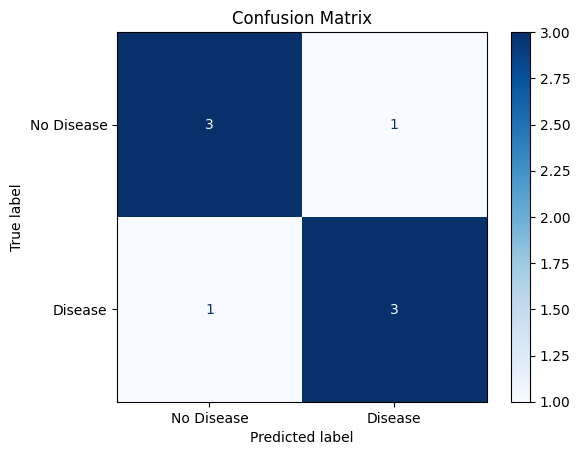

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = [1, 0, 1, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0]

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


🟦 Darker cells = more correct predictions
You can instantly see if your model’s messing up positives or negatives.

---

### When to Use:

* Whenever you’re debugging model behavior
* To *visually see* false positives/negatives
* Essential for **medical**, **fraud**, or **security** models

---

## 2️⃣ ROC Curve — “How good is your model at ranking?”

ROC = **Receiver Operating Characteristic Curve**
It tells you how well your model **separates** positives from negatives at *different thresholds.*

---

### Intuition

Normally, your model classifies something as “1” if probability ≥ 0.5.
But what if you changed that threshold to 0.3 or 0.8?

* At 0.3 → model predicts more positives → recall ↑, precision ↓
* At 0.8 → model predicts fewer positives → recall ↓, precision ↑

ROC Curve shows how True Positive Rate (TPR) and False Positive Rate (FPR) change when you slide that threshold.

---

### Formula Recap

| Metric           | Formula        | Meaning                                                |
| ---------------- | -------------- | ------------------------------------------------------ |
| **TPR (Recall)** | TP / (TP + FN) | Fraction of real positives correctly identified        |
| **FPR**          | FP / (FP + TN) | Fraction of real negatives wrongly labeled as positive |

Then plot **TPR (Y-axis)** vs **FPR (X-axis)** for all thresholds between 0 and 1.

---

### Perfect, Random & Bad Models

| Model    | ROC Curve                           | AUC Value |
| -------- | ----------------------------------- | --------- |
| Perfect  | Goes straight up to (0,1) then flat | 1.0       |
| Random   | Diagonal line from (0,0) to (1,1)   | 0.5       |
| Terrible | Below diagonal (predicts opposite)  | < 0.5     |

---

### Code Example

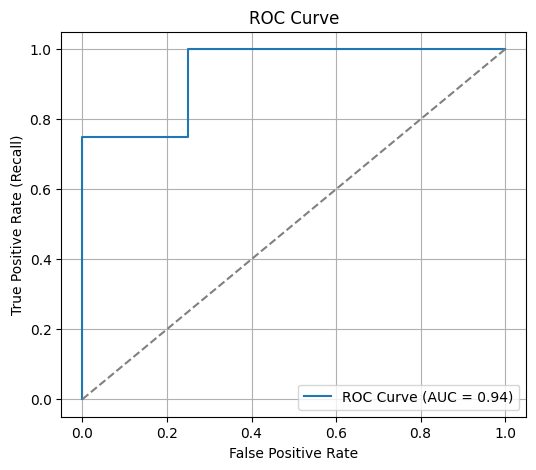

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Example probs
y_true = [0, 0, 1, 1, 1, 0, 1, 0]
y_prob = [0.1, 0.4, 0.35, 0.8, 0.9, 0.2, 0.85, 0.05]

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
auc = roc_auc_score(y_true, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

### Interpreting the AUC (Area Under Curve)

| AUC Range | Model Quality      |
| --------- | ------------------ |
| 0.9 – 1.0 | 🔥 Excellent       |
| 0.8 – 0.9 | 👍 Good            |
| 0.7 – 0.8 | 🙂 Fair            |
| 0.6 – 0.7 | 😬 Poor            |
| 0.5       | 🪦 Random guessing |

---

## 3️⃣ Bonus: Precision–Recall Curve

ROC is great for balanced datasets.
But for **imbalanced datasets** (like fraud detection), Precision–Recall Curve gives better insight.

Use:

```python
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
```

---

## Summary

| Metric                     | What It Shows                        | Best Use         |
| -------------------------- | ------------------------------------ | ---------------- |
| **Confusion Matrix**       | Raw counts of predictions            | Always           |
| **ROC Curve**              | Trade-off between TPR & FPR          | Balanced data    |
| **AUC**                    | Overall ranking quality              | Model comparison |
| **Precision–Recall Curve** | Trade-off between Precision & Recall | Imbalanced data  |

---

## Takeaway

> You can’t just say *“my accuracy is 95%”* —
> You’ve gotta show **why** and **how** your model behaves.

These visual metrics separate **ML engineers** from **ML beginners**.

---

# Regression Metrics (MSE, RMSE, MAE, R²)

When your model predicts **continuous values** (like house prices, salaries, or stock returns),
you can’t talk about *accuracy* or *precision* anymore.

Instead, you measure **how far off your predictions are** from the actual values.
That’s where regression metrics come in 👇

---

## 1️⃣ Mean Absolute Error (MAE)

### Formula:

$$
MAE = \frac{1}{n} \sum |y_{true} - y_{pred}|
$$

### Meaning:

Average absolute difference between predicted and actual values.
In simple words:

> “On average, how wrong were we?”

✅ Easy to interpret (same units as target)
⚠️ Treats all errors equally — outliers don’t hurt much.

### Example:

If actual = [100, 200, 300], predicted = [110, 220, 290]

→ Errors = [10, 20, 10]

→ MAE = (10 + 20 + 10) / 3 = **13.3**

---

## 2️⃣ Mean Squared Error (MSE)

### Formula:

$$
MSE = \frac{1}{n} \sum (y_{true} - y_{pred})^2
$$

### Meaning:

Average of squared differences between actual and predicted values.

✅ Punishes large errors more heavily (because of squaring).
⚠️ Not directly interpretable (unit is squared).

**Used when you really want to penalize big misses.**

---

## 3️⃣ Root Mean Squared Error (RMSE)

### Formula:

$$
RMSE = \sqrt{MSE}
$$

### Meaning:

Square root of MSE — brings metric back to same scale as target.

> “How far off are my predictions *on average*?”

✅ Most widely used in regression.
⚠️ Still sensitive to outliers (big mistakes blow up RMSE).

---

## 4️⃣ R² Score (Coefficient of Determination)

### Formula:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$
Where:

* ( SS_{res} = \sum (y_{true} - y_{pred})^2 ) → residual sum of squares
* ( SS_{tot} = \sum (y_{true} - \bar{y})^2 ) → total variance

### Meaning:

How much of the variance in the target is explained by your model.

✅ Ranges from 0 to 1
✅ Higher = better
❌ Can be negative if model performs worse than just predicting the mean

| R² Value | Interpretation              |
| -------- | --------------------------- |
| 1.0      | Perfect fit                 |
| 0.9–0.7  | Great                       |
| 0.7–0.5  | Acceptable                  |
| < 0.5    | Weak model                  |
| < 0      | Worse than guessing mean 😭 |

---

## Example Code


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Example actual & predicted values
y_true = np.array([100, 200, 300, 400, 500])
y_pred = np.array([110, 190, 310, 380, 490])

# Metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.3f}")

### Output:


MAE : 10.00

MSE : 133.33

RMSE: 11.55

R²  : 0.986

---

## Quick Summary Table

| Metric   | Formula        | Penalizes Big Errors? | Same Units as Target? | Range / Ideal            |   |                        |
| -------- | -------------- | --------------------- | --------------------- | ------------------------ | - | ---------------------- |
| **MAE**  | Mean of        | y−ŷ                   |                       | ❌                        | 
| **MSE**  | Mean of (y−ŷ)² | ✅                     | ❌                     | 0 → ∞ (lower = better)   |   |                        
| **RMSE** | √MSE           | ✅                     | ✅                     | 0 → ∞ (lower = better)   |   |                        
| **R²**   | 1 − SSR/SST    | ❌                     | ⚙️ (ratio)            | −∞ → 1 (higher = better) |

---

## TL;DR:

> * Use **MAE** when you want interpretability.
> * Use **RMSE** when you care about big errors.
> * Use **R²** to compare models.
> * Use **MSE** mainly for math or optimization, not direct reporting.

